## Introduçao a Visão Computacional

Verificando versão instalada do OpenCV

In [ ]:
import cv2
print(cv2.__version__)

Carregando uma imagem previamente existente

In [ ]:
image = cv2.imread("imagens/russian.jpg")
image_small = cv2.resize(image, (0,0), fx=0.5, fy=0.5) 

print("comprimento (w): %d pixels" % (image.shape[1]))
print("altura (h): %d pixels" % (image.shape[0]))
print("canais: %d" % (image.shape[2]))

Exibindo a imagem uma janela separada

In [ ]:
cv2.imshow("Russian", image)
cv2.waitKey()
cv2.destroyAllWindows()

Escrevendo o objeto image em outro arquivo

In [ ]:
cv2.imwrite("russian_2.jpg", image)

A representação da imagem aberta é (1536, 1028, 3), sendo o último parâmetro o número de canais, um para cada cor do RGB.

In [ ]:
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: %d, Green: %d, Blue: %d" % (r, g, b))

In [ ]:
image[0:10, 0:10] = (0, 0, 255)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: %d, Green: %d, Blue: %d" % (r, g, b))

In [ ]:
cv2.imshow("Russian", image)
cv2.waitKey()
cv2.destroyAllWindows()

Conversão de uma imagem em escala de cinza

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image_small = cv2.resize(gray_image, (0,0), fx=0.5, fy=0.5) 

In [ ]:
cv2.imshow("Russian Grayscale", gray_image_small)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
g = gray_image[0, 0]
print("Pixel at (0, 0) - Grayscale: %d" % (g))

In [ ]:
gray_image.shape

In [ ]:
image.shape

Manipulando imagem no espaço HSV

In [ ]:
hsv_image = cv2.cvtColor(image_small, cv2.COLOR_BGR2HSV)

In [ ]:
cv2.imshow("Russian hsv", hsv_image)
cv2.imshow("Russian hue", hsv_image[:,:,0])
cv2.imshow("Russian saturation", hsv_image[:,:,1])
cv2.imshow("Russian value", hsv_image[:,:,2])
cv2.waitKey()
cv2.destroyAllWindows()

Manipulando imagem no espaço RGB

*A função split separa de uma imagem RGB (ou BGR) suas componetnes R, G e B.*

In [ ]:
b, g, r = cv2.split(image_small)

cv2.imshow("Russian", image_small)
cv2.imshow("Russian red", r)
cv2.imshow("Russian green", g)
cv2.imshow("Russian blue", b)
cv2.waitKey()
cv2.destroyAllWindows()

Utilizando a função merge para combinar as componentes de cores e trazer sua visualização original.

In [ ]:
import numpy as np

b, g, r = cv2.split(image_small)
zeros = np.zeros(image_small.shape[:2], dtype=np.uint8)
cv2.imshow("Russian red", cv2.merge([zeros, zeros, r]))
cv2.imshow("Russian green", cv2.merge([zeros, g, zeros]))
cv2.imshow("Russian blue", cv2.merge([b, zeros, zeros]))
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
b, g, r = cv2.split(image_small)

cv2.imshow("Russian", cv2.merge([b, g, r]))
cv2.imshow("Russian green intensified", cv2.merge([b, g+100, r]))
cv2.imshow("Russian blue intensified", cv2.merge([b+100, g, r]))
cv2.imshow("Russian red intensified", cv2.merge([b, g, r+100]))

cv2.waitKey()
cv2.destroyAllWindows()

## Histogramas

In [ ]:
cv2.imshow("Blue Man Group", image)
cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

plt.style.use('seaborn')

In [ ]:
colors = {"b": 0, "g": 1, "r": 2}

In [ ]:
image = cv2.imread("aula-1/imagens/blue-man-group.jpg")
image_plt = mpimg.imread("aula-1/imagens/blue-man-group.jpg")
plt.imshow(image_plt)
plt.show()

def histogram_bgr(image):
    for color in colors:
        histr = cv2.calcHist([image],[colors[color]],None,[256],[0,256])
        plt.plot(histr,color = color)
        plt.xlim([0,256])
    plt.show()

def histogram_hsv(image_hsv):
    hsv_image = cv2.cvtColor(image_hsv, cv2.COLOR_BGR2HSV)
    hue_hist = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    plt.plot(hue_hist)
    plt.show() 

histogram_bgr(image)
histogram_hsv(image)

In [ ]:
image_seven_plt = mpimg.imread("aula-1/imagens/seven.jpg")
image_seven = cv2.imread("aula-1/imagens/seven.jpg")

plt.imshow(image_seven_plt)
plt.show()

histogram_bgr(image_seven)
histogram_hsv(image_seven)

In [ ]:
image_ww_plt = mpimg.imread("aula-1/imagens/willy-wonka.jpg")
image_ww = cv2.imread("aula-1/imagens/willy-wonka.jpg")

plt.imshow(image_ww_plt)
plt.show()

histogram_bgr(image_ww_plt)
histogram_hsv(image_ww_plt)

In [ ]:
image_tv_test_plt = mpimg.imread("aula-1/imagens/tv-image-test.png")
image_tv_test = cv2.imread("aula-1/imagens/tv-image-test.png")

plt.imshow(image_tv_test)
plt.show()

histogram_bgr(image_tv_test)
histogram_hsv(image_tv_test)

<IPython.core.display.Javascript object>


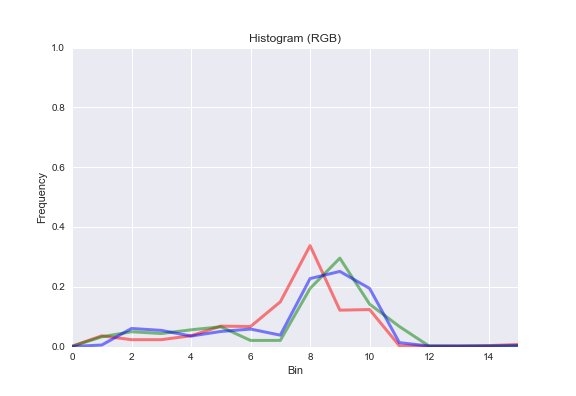

In [6]:
%matplotlib notebook

color = "rgb"
bins = 16

capture = cv2.VideoCapture(0)

# Initialize plot.
fig, ax = plt.subplots()
ax.set_title('Histogram (RGB)')
ax.set_xlabel('Bin')
ax.set_ylabel('Frequency')

# Initialize plot line object(s). Turn on interactive plotting and show plot.
lw = 3
alpha = 0.5
if color == 'rgb':
    lineR, = ax.plot(np.arange(bins), np.zeros((bins,)), c='r', lw=lw, alpha=alpha)
    lineG, = ax.plot(np.arange(bins), np.zeros((bins,)), c='g', lw=lw, alpha=alpha)
    lineB, = ax.plot(np.arange(bins), np.zeros((bins,)), c='b', lw=lw, alpha=alpha)

ax.set_xlim(0, bins-1)
ax.set_ylim(0, 1)

plt.ion()
plt.show()

# Grab, process, and display video frames. Update plot line object(s).
while True:
    (grabbed, frame) = capture.read()

    if not grabbed:
        break

    # Normalize histograms based on number of pixels per frame.
    numPixels = np.prod(frame.shape[:2])
    cv2.imshow('RGB', frame)
    (b, g, r) = cv2.split(frame)
    histogramR = cv2.calcHist([r], [0], None, [bins], [0, 255]) / numPixels
    histogramG = cv2.calcHist([g], [0], None, [bins], [0, 255]) / numPixels
    histogramB = cv2.calcHist([b], [0], None, [bins], [0, 255]) / numPixels
    lineR.set_ydata(histogramR)
    lineG.set_ydata(histogramG)
    lineB.set_ydata(histogramB)
    fig.canvas.draw()

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    if 0xFF == ord('p'):
        capture.pause()
   

capture.release()
cv2.destroyAllWindows()

In [4]:
capture.release()
cv2.destroyAllWindows()

## Construção de imagens

Desenhando um painel em branco. Uma imagem em branco é considerada ausente de pixels, logo seu aspecto gráfico é preto.

In [ ]:
image_color = np.zeros((512, 512, 3), np.uint8)
image_grayscale = np.zeros((512, 512), np.uint8)

cv2.imshow("Imagem colorida", image_color)
cv2.imshow("Imagem preto/branco", image_grayscale)

cv2.waitKey(0)
cv2.destroyAllWindows()

Desenhando uma linha.

_A função **line** recebe como parâmetros de entrada a imagem, as coordenadas (x,y) de início, fim, cor em RGB e espessura da linha._

In [ ]:
image_color = np.zeros((512, 512, 3), np.uint8)
cv2.line(image_color,(0,0), (511,511), (100, 50, 200), 10)
cv2.imshow("Linha", image_color)

cv2.waitKey(0)
cv2.destroyAllWindows()

Desenhando um quadrado ou retângulo. 

_A funçao **rectangle** recebe como parâmetros de entrada a imagem, as coordenadas do vértice de início, do vértice oposto, cor em RGB e espessura da linha._

In [ ]:
image_color = np.zeros((512, 512, 3), np.uint8)
cv2.rectangle(image_color,(100,100), (400,400), (100, 50, 200), 10)
cv2.imshow("Retângulo", image_color)

cv2.waitKey(0)
cv2.destroyAllWindows()

Desenhando um quadrado ou retângulo com cores invertidas.

In [ ]:
image_color = np.zeros((512, 512, 3), np.uint8)
cv2.rectangle(image_color,(100,100), (400,400), (100, 50, 200), -1)
cv2.imshow("Retângulo", image_color)

cv2.waitKey(0)
cv2.destroyAllWindows()

Desenhando círculos. 

_A função **circle** recebe como parâmetros de entrada a imagem, origem do círculo, raio, cor em RGB e espessura da linha._

In [ ]:
image_color = np.zeros((512, 512, 3), np.uint8)
cv2.circle(image_color,(250,250), 100, (100, 50, 200), 10)
cv2.imshow("Círculo", image_color)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image_color = np.zeros((512, 512, 3), np.uint8)
cv2.circle(image_color,(250,250), 100, (100, 50, 200), -1)
cv2.imshow("Círculo", image_color)

cv2.waitKey(0)
cv2.destroyAllWindows()

Desenhando polígonos. 

_A função **polylines** recebe como parâmetros de entrada a imagem, as coordenadas (x,y) de cada vértice do polígono, valor booleano par polígono aberto ou fechado, cor em RGB e espessura da linha._

In [ ]:
image_color = np.zeros((512, 512, 3), np.uint8)

pts = np.array( [[200,120], [300,50], [350,300], [300,400], [200,150]], np.int32)

cv2.polylines(image_color, [pts], True, (100, 50, 200), 10)
cv2.imshow("Polígonos", image_color)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image_color = np.zeros((512, 512, 3), np.uint8)

pts = np.array( [[200,120], [300,50], [350,300], [300,400], [200,150]], np.int32)

cv2.polylines(image_color, [pts], False, (100, 50, 200), 10)
cv2.imshow("Polígonos", image_color)

cv2.waitKey(0)
cv2.destroyAllWindows()

_A função **fillPolly** recebe como parâmetros de entrada a imagem, as coordenadas (x,y) de cada vértice do polígono e cor em RGB._

In [ ]:
image_color = np.zeros((512, 512, 3), np.uint8)

pts = np.array( [[200,120], [300,50], [350,300], [300,400], [200,150]], np.int32)

cv2.fillPoly(image_color, [pts], (100, 50, 200))
cv2.imshow("Polígonos", image_color)

cv2.waitKey(0)
cv2.destroyAllWindows()

Inserindo textos em uma imagem. As fontes disponíveis não suporta caracteres especiais (UTF-8) como acentos. Se isto for um problema deve-se olhar para outras bibliotecas que podem fazer este trabalho um pouco melhor como o PIL.

_A função **putText** recebe como parâmetro de entrada a imagem, o texto, as coordenadas (x,y), a fonte, o tamanho da fonte, a cor em RGB e a espessura da linha_

In [ ]:
image_color = np.zeros((512, 512, 3), np.uint8)
cv2.putText(image_color, "Ola Mundo!", (75,200), cv2.FONT_HERSHEY_SIMPLEX, 2, (100,170,0), 1)
cv2.imshow("Círculo", image_color)

cv2.waitKey(0)
cv2.destroyAllWindows()